## UNIVERSIDADE ESTADUAL DE SANTA CRUZ - UESC
#### DEPARTAMENTO DE ENGENHARIAS E COMPUTAÇÃO - DEC
#### CURSO DE ENGENHARIA QUÍMICA

**CET1012** - Modelagem, Simulação e Otimização de Processos Químicos.

**Tema**: Modelagem de Reação Química em um Reator.

**Professor**: Prof. Dr E.R.Edwards

**Assunto**: Métodos de matrizes sparsas na modelagem de reatores.

**Fonte**: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html

#### Cálculos de matrizes diagonais.
**Parâmetros**:<br>
**Diagonais**
sequência de array_like
Sequência de matrizes contendo as diagonais da matriz, correspondentes a compensações.

**Deslocamentos**
sequência de int ou int, opcional

**Diagonais a definir**:
- k = 0 a diagonal principal (padrão)

- k > 0 a k-ésima diagonal superior

- k < 0 a k-ésima diagonal inferior

**forma**
Tupla de int, opcional
Forma do resultado. Se omitida, uma matriz quadrada grande o suficiente para conter as diagonais é retornado.

**formato**
{"dia", "csr", "csc", "lil", ...}, opcional
Formato matricial do resultado. Por padrão (format=None) um o formato de matriz esparso apropriado é retornado. Esta escolha é sujeito a alterações.

**dtype**
dtype, opcional
Tipo de dados da matriz.



#### Matrizes triangulares

**Fonte**: Anton Rorres, "Álgebra Linear com Aplicação". 8$^o$Edição. pág.67

Uma matriz quadrada na qual todas as entradas acima da diagonal principal são zero é chamada de **triangular inferior** e uma matriz na qual todas as entradas abaixo da diagonal principal são zeros é chamada **triangular superior**. Uma matriz que é triangular inferior ou triangular superior é chamada **triangular**.


#### Exemplo:
Matriz triangular superior $4x4$ arbitrária:

\begin{equation}
    \begin{bmatrix}
    {\color{blue}a_{11}} & a_{12} & a_{13} & a_{14} \\
    0 &  {\color{blue}a_{22}} & a_{23} & a_{24} \\
    0 & 0 & {\color{blue}a_{33}} & a_{34} \\
    0 & 0 & 0 &  {\color{blue}a_{44}} \\
    \end{bmatrix}
\end{equation}


Matriz triangular inferior $4x4$ arbitrária:

\begin{equation}
    \begin{bmatrix}
    {\color{blue}a_{11}} & 0 & 0 & 0  \\
   a_{21} &  {\color{blue}a_{22}} & 0 & 0 \\
    a_{31} & a_{32} & {\color{blue}a_{33}} & 0 \\
    a_{41} & a_{42} & a_{43} &  {\color{blue}a_{44}} \\
    \end{bmatrix}
\end{equation}


#### Exemplo:
Considere as matrizes triangulares superior abaixo.

\begin{equation}
A =
    \begin{bmatrix}
    1 & 3  & -1  \\
    0 & 2  & 4  \\
    0 & 0  & 5 \\
    \end{bmatrix}
    \
B =
    \begin{bmatrix}
    3 & -2  & 2  \\
    0 & 0  & -1  \\
    0 & 0  & 1 \\
    \end{bmatrix}
\end{equation}

A matriz A é inversível, pois suas entradas na diagonal principal são não-nulas, mas a matriz $B$ não é. 

Ou seja, para que você consiga calcular a inversa da matriz ($A^{-1}$) diagonal superior ou inferior, os valores armazenados não podem ter nenhum zero.

In [1]:
import numpy as np
from scipy.sparse import diags

In [2]:
diagonals = [[1, 2, 3, 4], [1, 2, 3], [1, 2]]
Matrix = diags(diagonals, [0, -1, 2]).toarray()
Matrix

array([[1., 0., 1., 0.],
       [1., 2., 0., 2.],
       [0., 2., 3., 0.],
       [0., 0., 3., 4.]])

## AULA 15/05 CONTINUAÇÃO DA AULA 10/05

#### Exercício 2:

A transmissão de escalares é suportada (mas a forma (shape) precisa ser especificada):


In [4]:
Matrix_2 = diags([1, -2, 1], [-1, 0, 1], shape=(4, 4)).toarray()
Matrix_2


array([[-2.,  1.,  0.,  0.],
       [ 1., -2.,  1.,  0.],
       [ 0.,  1., -2.,  1.],
       [ 0.,  0.,  1., -2.]])

#### Agora vamos para uma aplicação na resolução de um problema de Engenharia Química

Modelagem de Reações Químicas em um Reator

Considere um reator químico que opera com as seguintes reações:

1. Reação 1: A + B → C
2. Reação 2: C → D

Neste sistema, temos as seguintes taxas de reação:

- Taxa de consumo de A ($ r_A $): <br>
$ r_A = k_1.C_A.C_B $

- Taxa de consumo de B ($ r_B $): <br>
$ r_B = k_1.C_A.C_B $

- Taxa de formação de C ($ r_C $): <br>
$ r_C = k_1.C_A.C_B - k_2.C_C $

- Taxa de formação de D ($r_D$):<br>
$ r_D = k_2.C_c $


onde: <br>

- $C_A$, $C_B$, $C_C$, $C_D$ são as concentrações dos componentes $A$, $B$, $C$ e $D$, respectivamente.

- $k_1$ e $k_2$ são as constantes de velocidade das reações.


Agora, vamos montar o sistema de **Equações Diferenciais** para modelar a evolução das concentrações ao longo do tempo:

1. $\frac{dC_A}{dt} = -r_A$ <br>

2. $\frac{dC_B}{dt} = -r_B$ <br>

3. $\frac{dC_C}{dt} = r_C$  <br>

4. $\frac{dC_D}{dt} =  r_D$ <br>


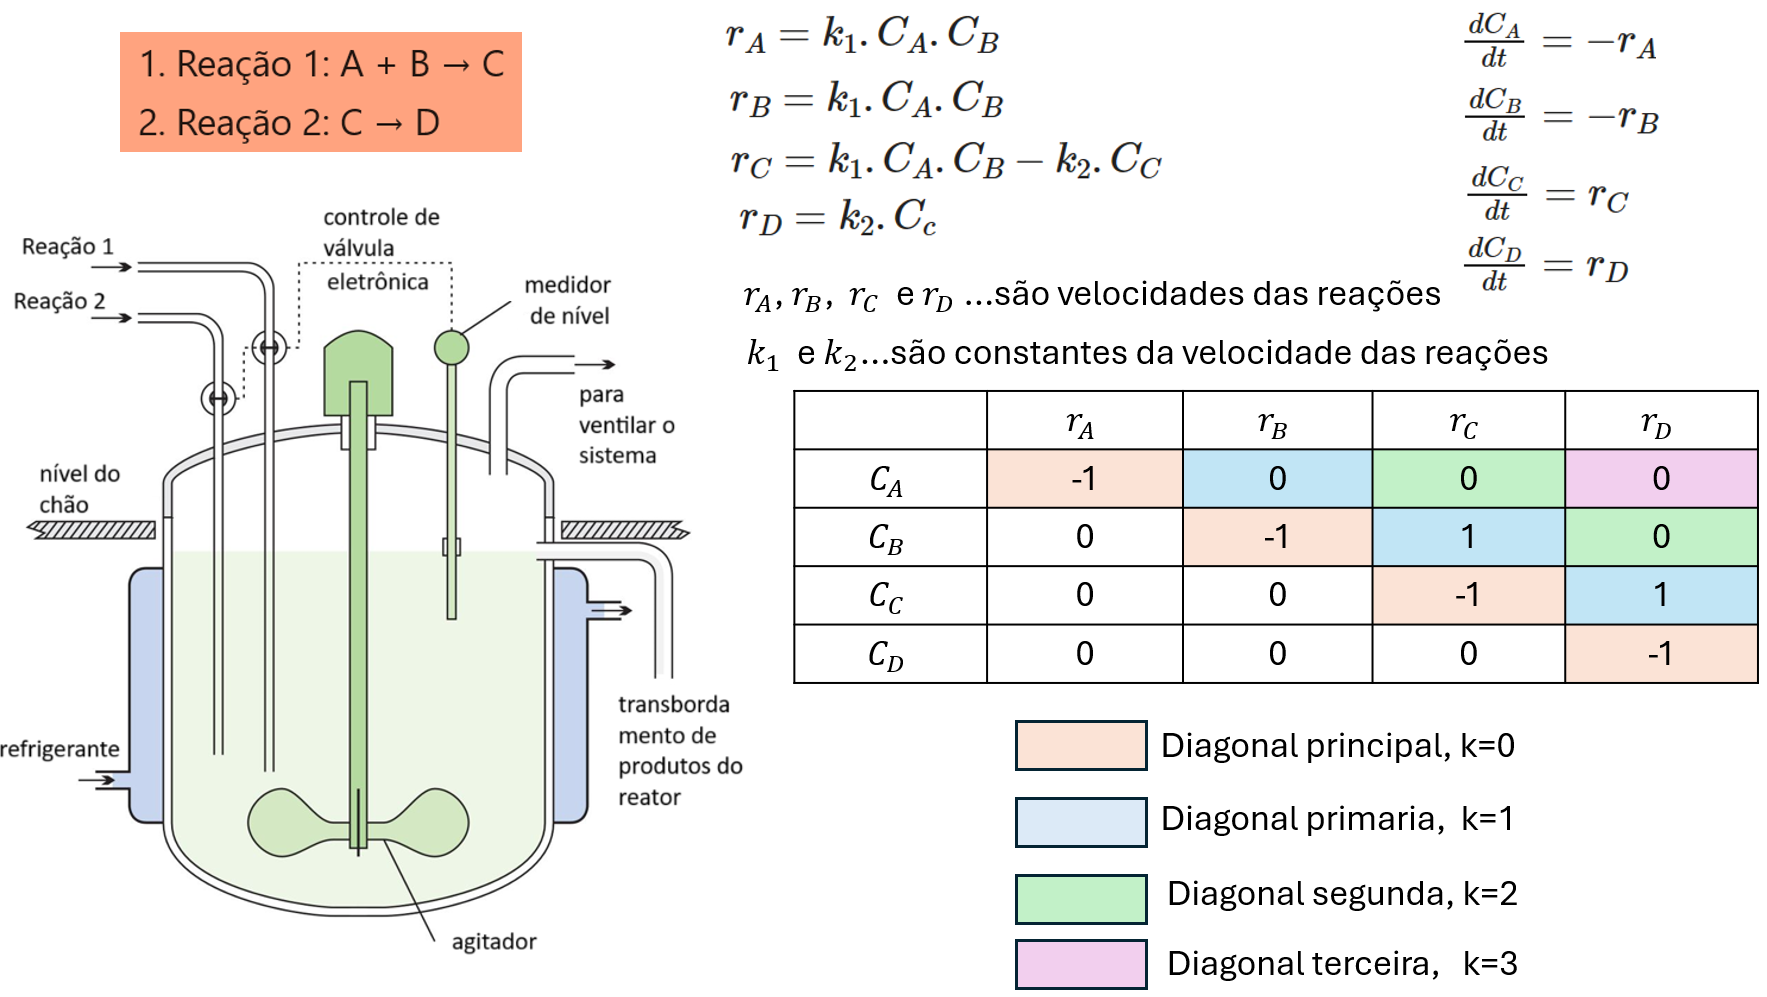

In [3]:
#pip install ipython -> Já deve estar instalado.
from IPython.display import Image, display

display(Image(filename='reator_matriz.png', width=600))


A matriz $A$ com os coeficientes das concentrações é:


\begin{equation}
A =
\begin{bmatrix}
-1 &  0 & 0 & 0 \\
 0 & -1 & 1 & 0 \\
 0 & 0 & -1 & 1\\
 0 & 0 & 0 & -1 \\
\end{bmatrix}
\end{equation}

O vetor $b$ com as concentrações iniciais é:

\begin{equation}
b = 
\begin{bmatrix}
C_{A0} \\
C_{B0} \\
C_{C0} \\
C_{D0}
\end{bmatrix}
\end{equation}


Agora, vamos resolver numericamente o sistema de equações diferenciais usando a biblioteca scipy.sparse e plotar os resultados em um gráfico.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.integrate import solve_ivp

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html


In [8]:
# Parâmetros
k1 = 0.1
k2 = 0.05
C_A0 = 1.0
C_B0 = 0.5
C_C0 = 0.01
C_D0 = 0.01


In [5]:
# Criando a matriz esparsa.

diagonals = np.array([[-1, 0, 0, 0], [0, -1, 1, 0], [0, 0, -1, 1], [0, 0, 0, -1]])

diagonals


array([[-1,  0,  0,  0],
       [ 0, -1,  1,  0],
       [ 0,  0, -1,  1],
       [ 0,  0,  0, -1]])

In [6]:
A = diags(diagonals, [0, 1, 2, 3]).toarray()
A


array([[-1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.]])

In [9]:
# Sistema de equações diferenciais.
def reator(t, y):
    return A @ y

# Tempo de simulação.
t_span = (0, 10) # 10 unidades de tempo.

# Resolvendo as equações diferenciais.
sol = solve_ivp(reator, t_span,  [C_A0, C_B0, C_C0, C_D0], t_eval=np.linspace(0, 10, 100))


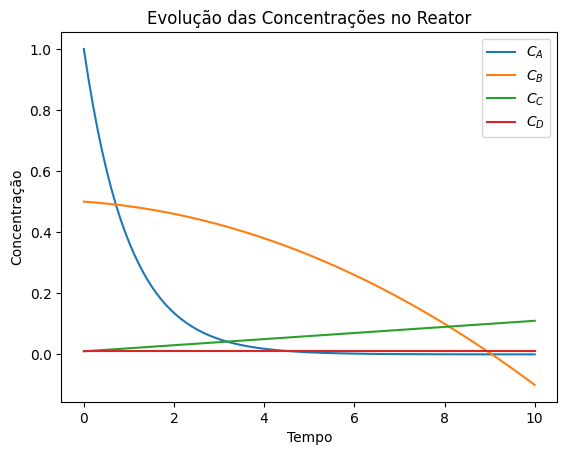

In [12]:
# Plotando os resultados
plt.plot(sol.t, sol.y[0], label='$C_A$')
plt.plot(sol.t, sol.y[1], label='$C_B$')
plt.plot(sol.t, sol.y[2], label='$C_C$')
plt.plot(sol.t, sol.y[3], label='$C_D$')
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.title('Evolução das Concentrações no Reator')
plt.show()
